<a href="https://colab.research.google.com/github/Majo0523/Estadistica_segundo_parcial/blob/main/Estad%C3%ADstica_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadistica decriptiva para variables cuantitativas

*   Graficos para datos univariados cuantitativos
*   Determinar las medidas descriptivas para datos univariados cuantitativos

In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import plotly.express as px
from sklearn .linear_model import LinearRegression

In [3]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving nac2020.csv to nac2020.csv


In [5]:
io_csv = io.BytesIO(uploaded['nac2020.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [6]:
df = tabla[["EDAD_PADRE", "EDAD_MADRE", "N_HIJOSV"]]
df.head(4)

,EDAD_PADRE,EDAD_MADRE,N_HIJOSV
COD_DPTO,,,
44,20,4,1
44,20,4,1
44,20,5,1
44,20,5,1


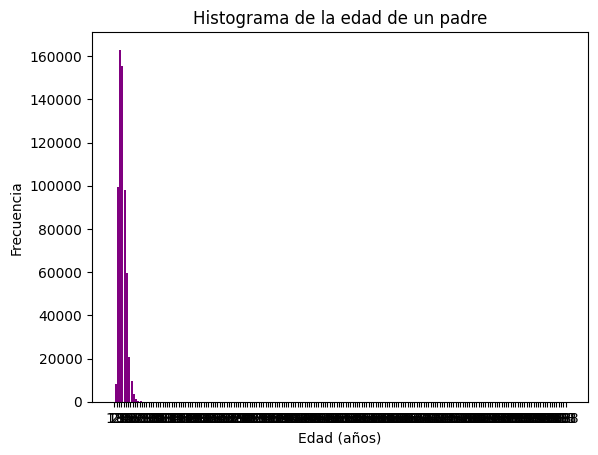

In [7]:
intervalos = range(min(df.EDAD_PADRE), max(df.EDAD_PADRE) + 1, 5)
plot.hist(df.EDAD_PADRE, bins=intervalos, color=('purple'), rwidth=0.85)
plot.title('Histograma de la edad de un padre')
plot.xlabel('Edad (años)')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)
plot.show()

In [8]:
df1 = df[(df.EDAD_PADRE < 120) & (df.EDAD_MADRE != 99) & (df.N_HIJOSV != 99)]
df1.head(5)

,EDAD_PADRE,EDAD_MADRE,N_HIJOSV
COD_DPTO,,,
44,20,4,1
44,20,4,1
44,20,5,1
44,20,5,1
44,20,3,1


<ipython-input-9-7877211d64ef>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label = 'distribucion normal', color = "darkblue")


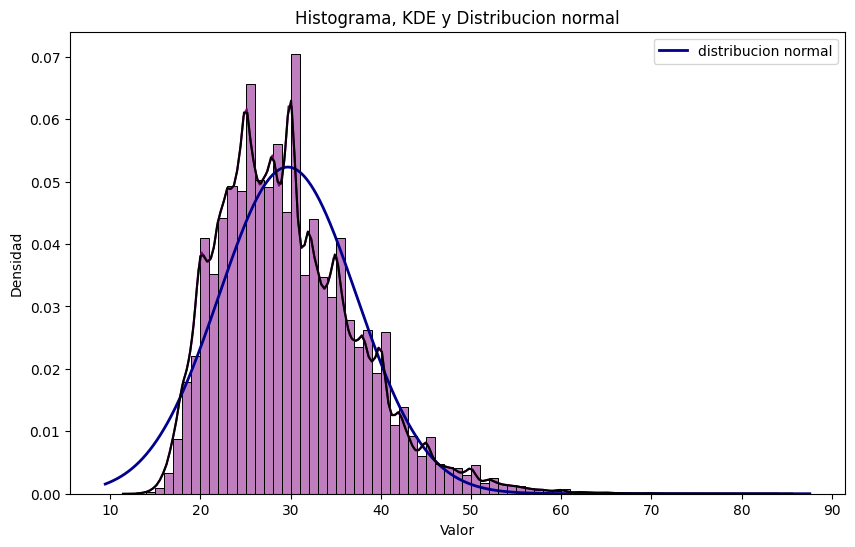

In [9]:
intervalos1 = range(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE) +1)
plot.figure(figsize=(10,6))
sns.histplot(x=df1.EDAD_PADRE, bins = intervalos1, kde = True, stat= "density", color = "purple", edgecolor = 'black')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE))

plt.plot(x, p, 'k', linewidth=2, label = 'distribucion normal', color = "darkblue")
sns.kdeplot(x=df1.EDAD_PADRE, color= "black")

plt.title('Histograma, KDE y Distribucion normal')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()

plt.show()

Sea $X:=$ Edad del padre de un recien nacido en Colombia.
Descriptivamente como la funcion de densidad de la probabilidad de los datos estimada por un metodo Kernel (linea negra) no conside con la funsion de densidad de probabilidad asumiendo el supuesto de normalidad (linea azul), $X\sim \text{normal} (\text{media}=\bar{x}, \text{Varianza} = S^2_x)$, entonces no asumimos normalidad.

In [ ]:
from scipy.stats import shapiro
shapiro(df1.EDAD_PADRE)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9588148593902588, pvalue=0.0)

*   Si el **valor de p** en una prueba de hipotesis es menor que 0.05 se rechaza la hipotesis nula con una confianza del 95%.
*   Si el **valor de p** en una prueba de hipotesis es mayor que 0.05 no se rechaza la hipotesis nula con una confianza del 95%.

En nuestro caso particular tenemos que pvalue= 0.0 < 0.05, es decir se rechaza la variable aleatoria de la edad de un padre de un recien nacido en Colombia presenta distribucion normal.


In [ ]:
df1.EDAD_PADRE.count()
len(df1.EDAD_PADRE)

619932

In [ ]:
idx = np.random.randint(len(df1.EDAD_PADRE),size=100)
shapiro(df1.EDAD_PADRE.index[idx])

ShapiroResult(statistic=0.8369174003601074, pvalue=4.012407739395485e-09)

Como el valor de p (igual a $4.012407739395485 \times 10^{-9}$) es menor que 0.05, entonces se rechaza que la variable aleatoria de la edad de un padre de un recien nacido en Colombia presenta distribucion normal.


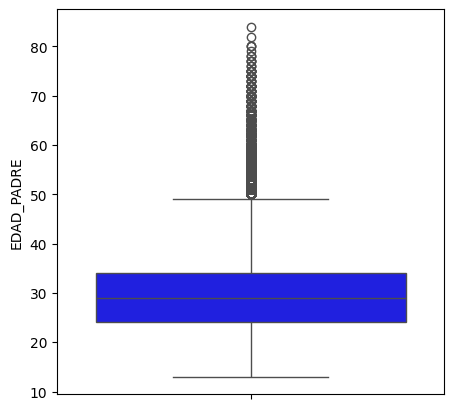

In [11]:
plt.figure(figsize=(5, 5))
sns.boxplot(df1.EDAD_PADRE, color='blue', saturation=0.75)
plt.show()

Se considera que la edad de un padre de un recien nacido en Colombia es atipica si es mayor que 50 años. El primer cuartil es aproximadamente 25 años, la media aritmetica es aproximadamente 29 años y el tercer cuartil es aproximadamente 35 años.

$\text {Rango intercuartilico = tercer cuartil - primer cuartil}= 35 - $25 = 10

De acuerdo con el diagrama de cajas y bigotes se percibe una alta variabilidad de la edad de un padre de un recien nacido en Colombia.

In [ ]:
print(f"Media: {np.mean(df1.EDAD_PADRE)}")
print(f"Varianza: {np.var(df1.EDAD_PADRE)} y la desviacion estandar es de {np.std(df1.EDAD_PADRE)}")
print(f"Asimetria: {skew(df1.EDAD_PADRE)}")
print(f"Curtosis: {kurtosis(df1.EDAD_PADRE)}")

Media: 29.677262990134402
Varianza: 58.1377076723756 y la desviacion estandar es de 7.624808697428126
Asimetria: 0.8353028835229743
Curtosis: 0.9739261066839422




*   Aproximadamente el promedio de la edad de un padre de un recien nacido en Colombia es de 29,7 años.
*   Aproximadamente la distancia entre los valores de un padre de un recien nacido en Colombia y la media es de 7,6 años.
*   La distribucion de la edad de un padre de un recien nacido en Colombia es asimetrica positiva, es decir, la media es mayor que la moda de la variable aleatoria.
*   La distribucion platicurtica, es decir, hay una baja concentracion de las edades de un padre de un recien nacido en Colombia con respecto a la media.




*   Diagrama de dispersión y la recta de regresión para datos bivariados

Una variable depende de la otra, cuando la ejecución de esta se ve afectada por la variable independiente. *Ejemplo*: El precio de una vivienda depende del número de habitaciones, ya que entre más habitaciones se tiene mayor precio.

Una variable está correlacionada con otra, cuando guardan cierta relación, pero no es posible hablar de dependencia Ejemplo Consumo de arroz y de carne, ya que se ha visto que al comerse mas arroz se come más carne, pero no hay una dependencia entre estas dos variables


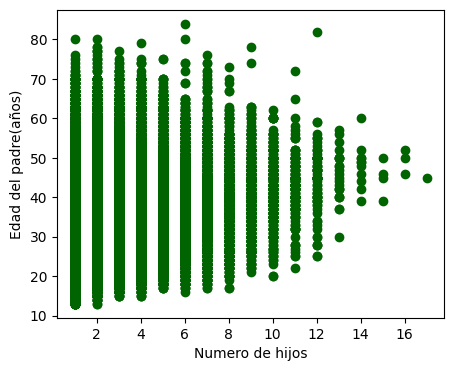

In [12]:
plt.figure(figsize=(5, 4))
plt.scatter(df1["N_HIJOSV"], df1["EDAD_PADRE"], color = "darkgreen", marker = "o")
plt.xlabel('Numero de hijos')
plt.ylabel('Edad del padre(años)')
plt.show()

Se observa el diagrama de dispercion una nube de puntos sin un patron particular, esto quiere decir que las variables son independientes o no estan correlacionados. Para nuestro ejemplo quiere decir que el numero de hijos y la edad de un padre en Colombia no estan correlacionados (padre joven con muchos hijos o un padre mayor con pocos hijos)

In [13]:
modelo = LinearRegression()
modelo.fit(np.array(df1.N_HIJOSV).reshape(-1, 1), np.array(df1["EDAD_PADRE"]).reshape(-1, 1))
predi_lineal = modelo.predict(np.array(df1.N_HIJOSV).reshape(-1, 1))
predi_lineal

array([[27.63034824],
       [27.63034824],
       [27.63034824],
       ...,
       [29.82688099],
       [27.63034824],
       [27.63034824]])

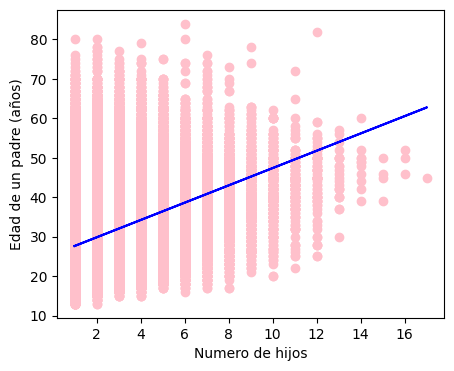

In [14]:
plt.figure(figsize=(5, 4))
plt.scatter(df1["N_HIJOSV"], df1["EDAD_PADRE"], color="pink", marker = "o")
plt.plot(df1["N_HIJOSV"], predi_lineal, linestyle='-', color="blue")
plt.xlabel('Numero de hijos')
plt.ylabel('Edad de un padre (años)')
plt.show()

De acuerdo con la recta de regrasion se determina una correlacion positiva, es decir entre mas hijos tiene un hombre en Colombia , mas años tiene esa persona.
*La variable Y depende positivamente de la variable X, es decir, entre mayor valor de X se tenga, mayor sera el valor de Y.*

In [ ]:
coef_pearson = np.corrcoef(df1["N_HIJOSV"], df1["EDAD_PADRE"])[0, 1]
coef_spearman, _=spearmanr(df1["N_HIJOSV"], df1["EDAD_PADRE"])
coef_kendall, _ = kendalltau(df1["N_HIJOSV"], df1["EDAD_PADRE"])
print(f"Los coeficientes de correlacion de pearson, spearman y kendall son respectivamente{coef_pearson}, {coef_spearman}, {coef_kendall}.")

Los coeficientes de correlacion de pearson, spearman y kendall son respectivamente0.339909584425517, 0.3645543846935495, 0.2875746849739477.


Para la interpretación de los coeficientes de correlación nos ayudaremos de la referencia:

Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174. [Link](https://www.jstor.org/stable/pdf/ 2529310.pdf)

* X y Y son independientes o no están correlacionadas: $\rho (X,Y) \approx 0, \eta (X,Y) \approx 0, \kappa (X,Y) \approx 0$.

* Y depende insignificantemente de X o X y Y están insignificantmente correlacionadas si $0 < \vert \rho (X,Y) \vert < 0.2$, $0 < \eta (X,Y) \vert < 0.2$, $0 \vert \kappa (X,Y) \vert < 0.2$.

* Y depende discretamente de X o X y Y están discretamente correlacionadas si $0.2 < \vert \rho (X,Y) \vert < 0.4$, $0.2 < \eta (X,Y) \vert < 0.4$, $0.2 < \vert \kappa (X,Y) \vert < 0.4$.

* Y depende moderadamente de X o X y Y están moderadamente correlacionadas si
$0.4 < \vert \rho (X,Y) \vert < 0.6$, $0.4 < \eta (X,Y) \vert < 0.6$, $0.4 < \vert \kappa (X,Y) \vert < 0.6$ Y depende sustancialmente de X o X y Y están sustancialmente correlacionadas si $0.6 < \vert \rho (X,Y) \vert, < 8.8$, $0.6 \eta (X,Y)\vert < 0.8$, $0.6 < \vert kappa (X,Y) \vert < 0.8$.

* Y depende fuertemente de XoXy Y están fuertmente correlacionadas si $0.8 < \vert \rho (X,Y) \vert < 1$, $0.8 < \eta (X,Y) \vert < 1$. $0.8 < \vert \kappa (X,Y) \vert < 1$.

De acuerdo con los coeficientes de correlacion de Pearson, de Kendall y de Spearman se determina que el numero de hijos de un padre y la edad de un padre de un recien nacido en Colombia estan discretamente correlacionadas.